# **Business Problem Understanding**
Dream Housing Finance company deais in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [52]:
data = pd.read_csv('LoanData.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [53]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# **Data Understanding**
 - Loan_ID  ---> Unique loan id
 - Gender  ---> Male / female
 - Married  ---> Applicant Married or not
 - Dependents  ---> Number of dependents
 - Education  ---> Applicants Education
 - Self_Employed  ---> Self employed or not
 - ApplicantIncome  ---> Applicant income
 - CoapplicantIncome  ---> Coapplicant income
 - LoanAmount  ---> Loan amount in thousands
 - Loan_Amount_Term  ---> Loan amount term in months
 - Credit_History  ---> Credit history meets guidlines
 - Property_Area  ---> Urban or rural area
 - Loan_Status  ---> Loan approved or not **Target Varible**

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [55]:
data['Loan_ID'].nunique()

614

**Drop Unimportant columns as per the Feature selection (Filter Methods)**

In [56]:
data.drop(columns=['Loan_ID'],inplace= True)

In [57]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [58]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [59]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [60]:
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [61]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [62]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [63]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [64]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [65]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [66]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [67]:
data['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [68]:
data['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

**Create New columns as per the Reqirement**

In [69]:
data['Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [70]:
data['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [71]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [72]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [73]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [74]:
data['Credit_History']= data['Credit_History'].replace({1:'good',0:'bad'})

In [75]:
data["Credit_History"].unique()

array(['good', 'bad', nan], dtype=object)

In [76]:
data['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [77]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [78]:
data['Property_Area'].value_counts

<bound method IndexOpsMixin.value_counts of 0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object>

In [79]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [80]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [81]:
continous = ['Income','LoanAmount']

discrete_categorical = ['Gender', 'Married', 'Education',
                        'Self_Employed', 'Credit_History',
                        'Property_Area', 'Loan_Status']

discrete_count =['Dependents','Loan_Amount_Term']

**Exploratory Data Analysis (EDA)**

For Continous Varible

In [82]:
data[continous].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,614.0,7024.705081,6458.663872,1442.0,4166.0,5416.5,7521.75,81000.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0


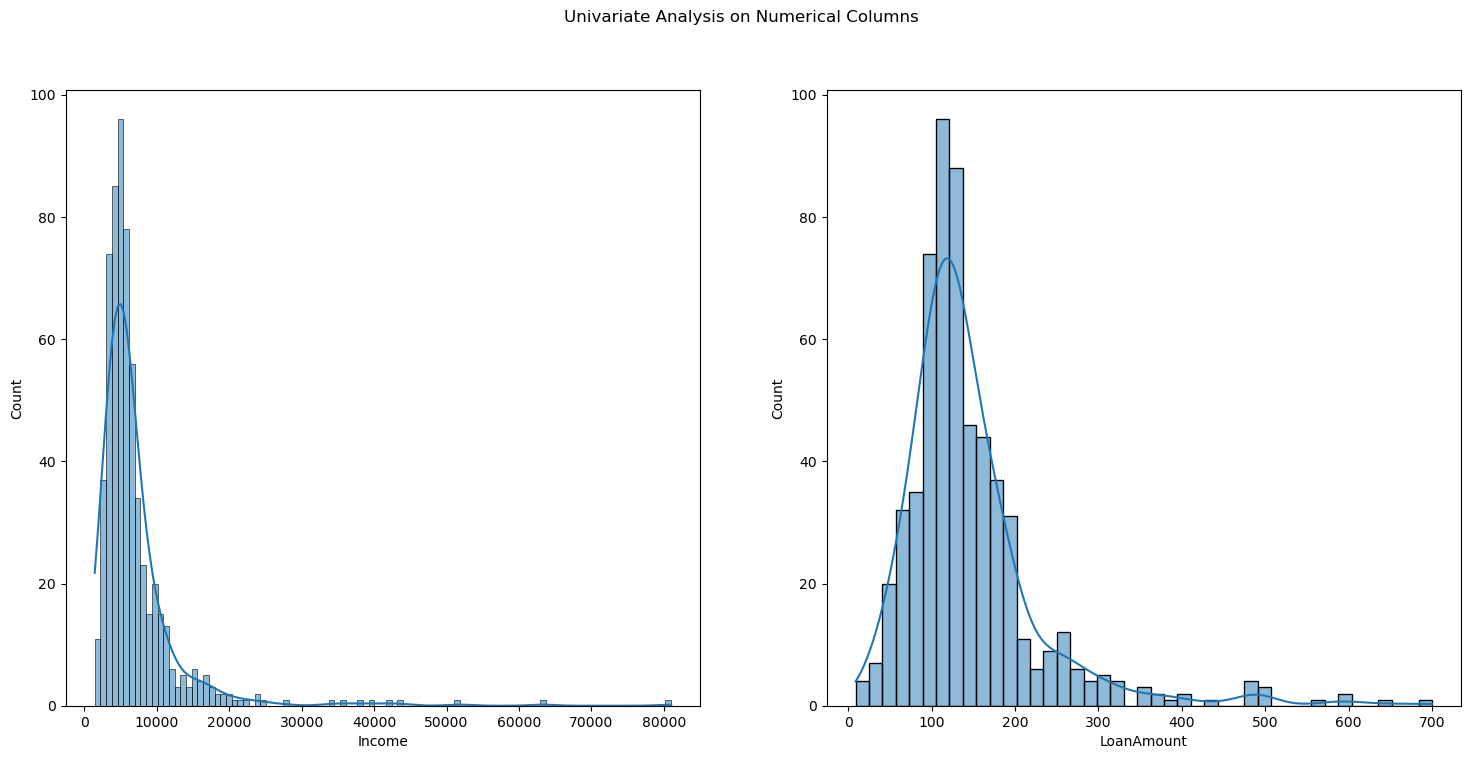

In [86]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.histplot(data['Income'],kde=True)

plt.subplot(1,2,2)
sns.histplot(data['LoanAmount'],kde=True)

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

In [87]:
data[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

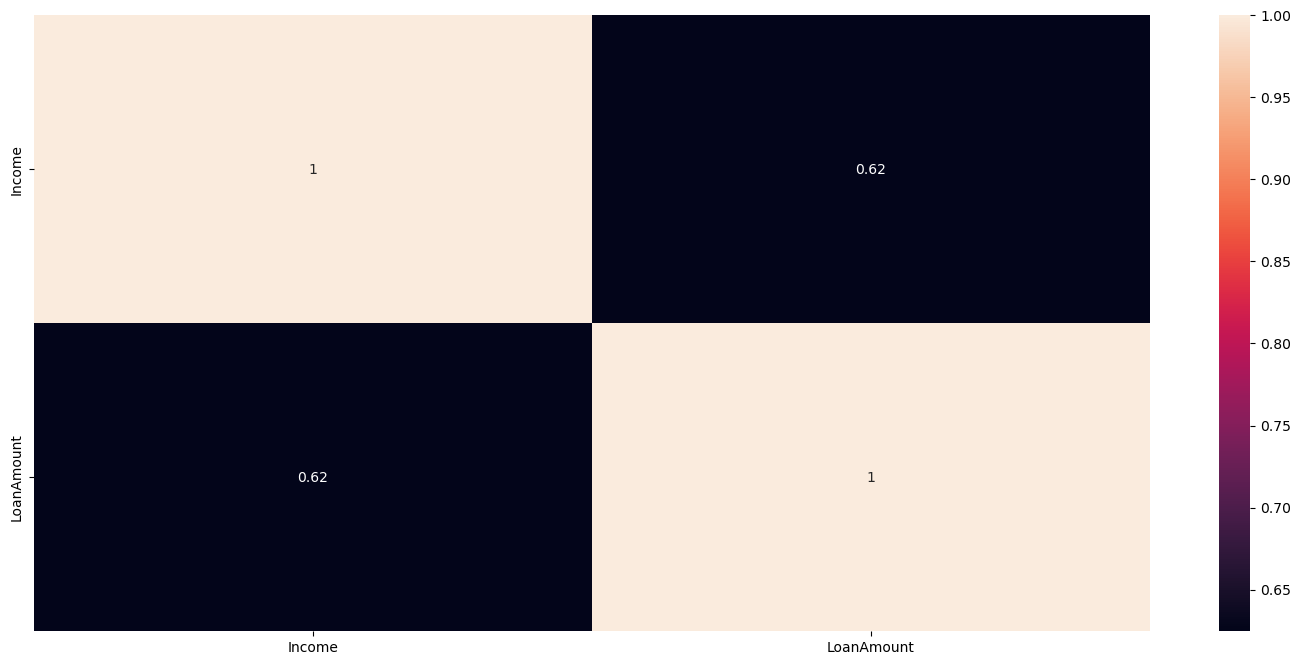

In [88]:
sns.heatmap(data[continous].corr(), annot=True)
plt.show()